In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('WELFake_Dataset.csv')
df.shape

(72134, 4)

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

DATA CLEANING

In [6]:
df1 = df.dropna()
df1.shape

(71537, 4)

In [7]:
df1.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [8]:
df1.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [9]:
df2 = df1.drop('Unnamed: 0', axis=1)
df2.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [10]:
df2['content'] = (df2['title'].fillna('') + " " + df2['text'].fillna('')).str.strip()
df2.head()

,title,text,label,content
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...


In [11]:
df3 = df2.drop(['title', 'text'], axis=1)
df3.head()

,label,content
0,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,1,SATAN 2: Russia unvelis an image of its terrif...
5,1,About Time! Christian Group Sues Amazon and SP...


In [12]:
import re
# re.sub(pattern, replacement, text)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\\S+|www\\S+", " ", text)   # remove URLs
    text = re.sub(r"<.*?>", " ", text)              # remove HTML
    text = re.sub(r"[^a-z0-9\\s]", " ", text)       # keep only letters/numbers
    text = re.sub(r"\\s+", " ", text)               # normalize spaces
    return text.strip()

In [13]:
df4 = df3.copy()
df4['content'] = df4['content'].apply(clean_text)
df4.head()

,label,content
0,1,law enforcement on high alert following threat...
2,1,unbelievable obama s attorney general says mo...
3,0,bobby jindal raised hindu uses story of chri...
4,1,satan 2 russia unvelis an image of its terrif...
5,1,about time christian group sues amazon and sp...


In [14]:
df4.shape

(71537, 2)

In [15]:
df4.drop_duplicates(subset=['content'], inplace=True)
df4.shape

(62848, 2)

In [16]:
df4.head()

,label,content
0,1,law enforcement on high alert following threat...
2,1,unbelievable obama s attorney general says mo...
3,0,bobby jindal raised hindu uses story of chri...
4,1,satan 2 russia unvelis an image of its terrif...
5,1,about time christian group sues amazon and sp...


Text(0.5, 0, 'News Type (0: Fake, 1: Real)')

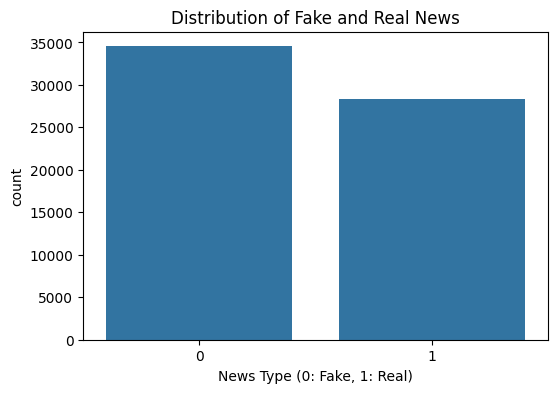

In [17]:
## plotting fake vs real news
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df4)
plt.title('Distribution of Fake and Real News')
plt.xlabel('News Type (0: Fake, 1: Real)')

In [18]:
df5 = df4.copy()

In [19]:
df5.head()

,label,content
0,1,law enforcement on high alert following threat...
2,1,unbelievable obama s attorney general says mo...
3,0,bobby jindal raised hindu uses story of chri...
4,1,satan 2 russia unvelis an image of its terrif...
5,1,about time christian group sues amazon and sp...


In [20]:
from sklearn.model_selection import train_test_split
X = df5['content']
y = df5['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf.shape, X_test_tfidf.shape

((50278, 190331), (12570, 190331))

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

def find_best_classifiers_gridsearch(X, y, cv_splits=5, random_state=42, n_jobs=-1, verbose=2):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state)
    scoring = 'f1_macro'

    algos = {
        "MultinomialNB": {
            "pipeline": Pipeline([
                ("tfidf", TfidfVectorizer()),
                ("clf", MultinomialNB())
            ]),
            "params": {
                "tfidf__ngram_range": [(1,1), (1,2)],
                "tfidf__max_features": [10000, 20000],
                "tfidf__min_df": [3, 5],
                "tfidf__stop_words": [None, "english"],
                "clf__alpha": [0.5, 1.0]
            }
        },
    }

    results, best_estimators = [], {}

    for name, cfg in algos.items():
        print(f"\nRunning GridSearch for: {name}")
        gs = GridSearchCV(cfg["pipeline"], cfg["params"], scoring=scoring, cv=cv, n_jobs=n_jobs, verbose=verbose)
        gs.fit(X, y)
        results.append({
            "model": name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
        best_estimators[name] = gs.best_estimator_

    results_df = pd.DataFrame(results).sort_values(by="best_score", ascending=False).reset_index(drop=True)
    return results_df, best_estimators

In [26]:
results_df, best_models = find_best_classifiers_gridsearch(X_train, y_train)
print(results_df)


Running GridSearch for: MultinomialNB
Fitting 5 folds for each of 32 candidates, totalling 160 fits
           model  best_score  \
0  MultinomialNB    0.873023   

                                         best_params  
0  {'clf__alpha': 0.5, 'tfidf__max_features': 200...  


In [27]:
model = Pipeline([
    ("tfidf", TfidfVectorizer(
        ngram_range=(1,2),       
        max_features=20000,      
        min_df=5,                
        stop_words='english'     
    )),
    ("clf", MultinomialNB(alpha=0.5))  
])

model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=20000, min_df=5,
                                 ngram_range=(1, 2), stop_words='english')),
                ('clf', MultinomialNB(alpha=0.5))])

In [28]:
model.score(X_test, y_test)

0.87175815433572

In [29]:
import pickle
with open('fakenews_detector.pickle', 'wb') as f:
    pickle.dump(model, f)

In [31]:
import json
columns = {
    'data_columns': [col.lower() for col in df5.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))